In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

In [68]:
expression = pd.read_csv('../P4/Gene_expression.csv')

In [69]:
y = pd.read_csv('labels.csv')
y = y.drop('Unnamed: 0',axis =1 )
y

,patient_id,Label
0,TCGA-05-4244,0
1,TCGA-05-4249,1
2,TCGA-05-4382,0
3,TCGA-05-4384,0
4,TCGA-05-4389,1
...,...,...
402,TCGA-NJ-A55O,0
403,TCGA-NJ-A55R,0
404,TCGA-NJ-A7XG,0
405,TCGA-O1-A52J,1


In [70]:
meta_file = y.merge(expression)
meta_file = meta_file.drop(['patient_id','sample_type'],axis = 1)

In [71]:
meta_file

,Label,?|100133144,?|100134869,?|10357,?|10431,?|155060,?|26823,?|340602,?|388795,?|390284,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
0,0,0.115255,0.097686,-1.940808,-0.033268,1.057022,1.176377,-0.577514,1.530721,0.136966,...,-0.745395,0.023953,-0.205987,-0.438921,-0.233740,-1.752495,0.980841,-0.505237,-0.279620,-0.447237
1,1,-0.233267,0.219007,-0.289184,0.202607,-0.069052,1.877450,-0.577514,0.029955,0.027188,...,-0.977605,-0.764733,0.780866,0.824841,0.422735,-0.120232,-0.112752,-0.890109,0.314648,0.096801
2,0,0.248854,-0.384813,-0.533564,-0.173685,0.583903,0.236868,1.884460,0.123771,-0.210492,...,0.688824,0.527161,-0.170358,-0.028243,-0.275621,0.608923,0.369427,1.273709,0.374660,-0.019820
3,0,-1.015130,-1.252003,-0.898805,-1.181021,0.757503,0.484314,-0.577514,-0.013923,0.260217,...,-0.410419,-1.600654,1.344431,1.144063,0.782634,-0.680088,-0.150073,-0.171071,1.255729,0.236221
4,1,-0.816478,0.346711,-1.143054,1.242887,-1.570895,-0.056828,-0.577514,-0.166251,-0.193914,...,0.604849,0.750372,1.330608,1.397679,-0.065455,0.673791,-1.420624,-0.711757,-0.833433,0.356558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,0.593944,0.996343,-0.009038,0.047639,0.668383,1.340455,-0.577514,-1.208640,-0.104800,...,-0.832927,-0.431204,-0.148779,-0.154760,0.222568,-0.210608,-0.386059,0.289729,0.667480,-0.396243
402,0,-0.069018,-0.011506,-0.817153,-0.316691,1.148248,0.675043,0.645656,2.908490,-1.628148,...,-1.495877,-0.170338,0.329302,0.156824,1.156270,0.476298,-0.242561,-0.339250,1.557140,-0.263652
403,0,1.749735,2.648401,-0.450322,-0.660086,1.016852,-0.892399,-0.577514,0.941106,-1.506687,...,-2.016211,-1.461710,-2.061653,-1.762218,0.543399,-0.541973,-1.441193,-1.226014,0.813458,-1.338024
404,1,0.486836,1.062102,-1.368185,0.780825,0.141787,3.015645,1.099217,0.123525,-0.071799,...,-1.826732,-0.432321,2.537119,1.141717,0.724190,-1.841894,-0.135198,0.430325,0.959205,-1.000029


In [72]:
meta_file.columns = meta_file.columns.str.replace(r'\|.*', '')

/var/folders/ry/3ggczbhs3fv456mb1z5tj82h0000gn/T/ipykernel_2339/3284926714.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  meta_file.columns = meta_file.columns.str.replace(r'\|.*', '')


In [73]:
X_train, X_test, y_train, y_test = train_test_split(meta_file.iloc[:,1:], meta_file.iloc[:,0], test_size=0.2, random_state=42)

In [74]:
model = LogisticRegression(C = 0.1,penalty='l1',solver='liblinear')

In [75]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accurary:')
print(accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accurary:
0.5487804878048781
Confusion Matrix:
[[22 14]
 [23 23]]


##  Test Prognosis Gene

## PCA

In [76]:
prog_gene = pd.read_csv('prognosis_genes.txt')

In [77]:
valid_genes = ['Label']
valid_genes += [col for col in prog_gene['GENES'] if col in meta_file.columns]
# Subset the DataFrame based on the valid target column names
prog_meta_file = meta_file[valid_genes]

In [78]:
prog_meta_file.iloc[:,1:]

,BAG1,CASP4,FADD,ITGA2,KRT18,KRT19,KRT7,LAMB1,BMP2,CDC6,...,GARS,PRDM2,RELA,RPS26,RPS3,RPS6KB1,TMF1,FEZ2,KIAA0020,KIAA0317
0,-0.300973,-1.609040,1.144728,1.466476,-0.045449,0.565879,-0.120513,-1.195601,0.775067,0.715580,...,-0.117246,-0.073421,-0.187672,-0.582885,0.175286,2.714577,1.047157,1.207741,-1.151396,0.546405
1,-0.326736,0.284783,-0.829652,0.872741,-0.429994,-0.556406,-1.453648,-1.133745,-1.459483,-1.149056,...,-1.165770,0.294106,0.247917,0.148228,-0.208277,0.700554,0.840149,1.429372,-0.572703,0.891123
2,-0.809002,0.666188,-0.071178,-0.373269,-0.579386,0.511680,-0.276158,0.927946,-0.569311,0.377111,...,-0.308248,0.518717,0.212465,1.202733,0.018419,-0.231853,-0.649095,0.706858,-0.922223,0.445354
3,2.153975,-0.408216,-0.112112,-1.143161,0.413813,-0.054186,0.437825,-0.290499,0.525574,-1.870488,...,-0.628239,0.752331,-0.372260,-0.282040,-0.435200,-0.382774,0.286660,0.277540,-0.979793,0.910829
4,0.946434,-0.220682,1.436611,-0.219743,-0.393587,-0.553767,-1.028831,-2.264036,-0.594682,0.430613,...,0.303840,-0.918451,1.687369,0.445765,1.377905,-0.721583,-1.758530,-0.384056,-0.535291,0.846636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1.720983,-0.294207,0.186656,-0.090690,-0.574602,0.432138,-0.153641,-0.108077,0.679123,-0.771427,...,-0.090514,0.173700,-0.065725,-1.066826,0.450599,-1.533007,0.313823,-0.575478,0.216629,0.329030
402,0.643838,-1.274854,-0.487768,-1.514758,-0.723718,-2.239129,-0.585106,0.278553,0.358615,-0.845496,...,-1.121742,-0.007252,-0.315306,-1.551902,-1.426268,-2.097207,-0.732777,-1.599209,-0.367065,0.397518
403,0.351929,0.644262,-0.065726,-0.313786,0.209452,0.176847,0.057328,-1.890316,-0.258741,-1.481856,...,-0.707428,-0.293120,-0.414321,0.344496,0.492651,-0.004379,-0.687599,-0.616669,-1.207571,-1.565932
404,-1.156108,0.114911,-0.363290,0.628345,-1.067190,-0.835419,0.185254,-1.021971,0.494188,-1.134124,...,-0.603268,0.103909,-0.079169,-1.090906,-1.923527,-1.358910,-1.883722,-0.607404,-1.195800,-0.097168


In [79]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(prog_meta_file.iloc[:,1:])
principalComponents = pd.DataFrame(principalComponents)
principalComponents.columns  = ['PCA1','PCA2']
principalComponents['label'] = prog_meta_file['Label']

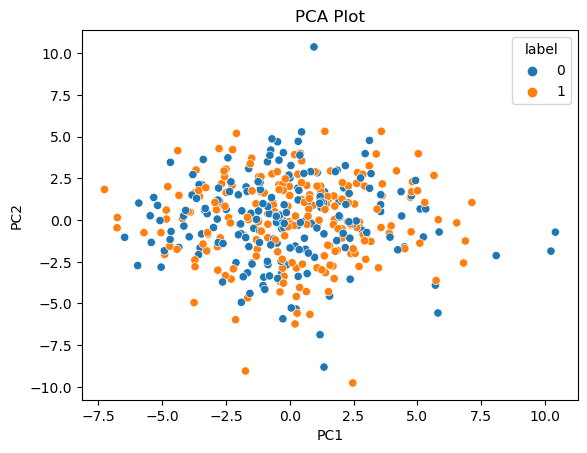

In [80]:
sns.scatterplot(data=principalComponents, x='PCA1', y='PCA2', 
               hue='label',
               )

# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')

# Show the plot
plt.show()

## CV

In [85]:
X_train,X_test, y_train, y_test = train_test_split(prog_meta_file.iloc[:,1:], prog_meta_file.iloc[:,0], test_size=0.2, random_state=42)

In [86]:
model = LogisticRegression(C = 1,penalty='none')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accurary:')
print(accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accurary:
0.47560975609756095
Confusion Matrix:
[[16 20]
 [23 23]]


/Users/hengxu/opt/anaconda3/envs/cse282/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [87]:
model = svm.SVC()
param_grid = {'C': [0.1,0.5,1,5,10],
              'kernel': ['linear','rbf',]}

In [88]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'kernel': ['linear', 'rbf']})

In [89]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.5, 'kernel': 'rbf'}
Best Score: 0.5619711538461539


In [90]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accurary:')
print(accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accurary:
0.5121951219512195
Confusion Matrix:
[[15 21]
 [19 27]]
